# Enrolment Analysis

This notebook is for analyzing the Aadhaar enrolment data.

In [1]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 1. CONSISTENT VISUAL IDENTITY
sns.set_theme(style="whitegrid")
plt.rcParams.update({
    "figure.figsize": (12, 6),
    "axes.titlesize": 16,
    "axes.labelsize": 12,
    "axes.titleweight": 'bold',
    "font.size": 11,
    "legend.fontsize": 10
})

# Color Palette Discipline
PALETTE_ENROL = ["#2c3e50", "#3498db", "#95a5a6"] # Deep Blues/Greys
PALETTE_STRESS = ["#bdc3c7", "#e74c3c"]          # Grey (Normal) vs Red (Risk)

In [2]:
# =========================================================
# PHASE 1 — DATA UNDERSTANDING : AADHAAR ENROLMENT DATASET
# =========================================================


pd.set_option("display.max_columns", None)
pd.set_option("display.width", 150)

# ---------------------------------------------------------
# 1. LOAD DATASET
# ---------------------------------------------------------
# Update filename if required
enrol_files = glob.glob('api_data_aadhar_enrolment/api_data_aadhar_enrolment/*.csv')

enrol_df = pd.concat([pd.read_csv(f) for f in enrol_files], ignore_index=True)

# Add date conversion to create year column
enrol_df['date'] = pd.to_datetime(enrol_df['date'], format='%d-%m-%Y')
enrol_df['year'] = enrol_df['date'].dt.year

print("Dataset loaded successfully!")
print("-" * 60)

# ---------------------------------------------------------
# 2. PREVIEW DATA
# ---------------------------------------------------------
print("HEAD (First 5 rows):")
display(enrol_df.head())

print("-" * 60)

# ---------------------------------------------------------
# 3. STRUCTURAL INFORMATION
# ---------------------------------------------------------
print("INFO:")
enrol_df.info()

print("-" * 60)

# ---------------------------------------------------------
# 4. STATISTICAL SUMMARY
# ---------------------------------------------------------
print("DESCRIBE (Numerical Columns):")
display(enrol_df.describe())

print("-" * 60)

# ---------------------------------------------------------
# 5. COLUMN LIST
# ---------------------------------------------------------
print("COLUMNS:")
print(list(enrol_df.columns))

print("-" * 60)

# ---------------------------------------------------------
# 6. UNIQUE VALUES EXPLORATION
# ---------------------------------------------------------

# Identify probable column names safely
state_col = [c for c in enrol_df.columns if "state" in c.lower()][0]
year_col = [c for c in enrol_df.columns if "year" in c.lower()][0]

print(f"Identified State Column : {state_col}")
print(f"Identified Year Column  : {year_col}")
print("-" * 60)

print("UNIQUE STATES:")
print(enrol_df[state_col].unique())
print(f"Total States/UTs: {enrol_df[state_col].nunique()}")

print("-" * 60)

print("UNIQUE YEARS:")
print(sorted(enrol_df[year_col].unique()))
print(f"Time Span: {enrol_df[year_col].min()} - {enrol_df[year_col].max()}")

print("-" * 60)

# ---------------------------------------------------------
# 7. MISSING VALUE CHECK
# ---------------------------------------------------------
print("MISSING VALUES PER COLUMN:")
display(enrol_df.isnull().sum())

print("-" * 60)

# ---------------------------------------------------------
# 8. BASIC GRANULARITY CHECK
# ---------------------------------------------------------
print("DATASET GRANULARITY CHECK:")

sample_group = enrol_df.groupby([state_col, year_col]).size().reset_index(name="records")
print("Max records per State-Year combination:", sample_group["records"].max())

print("-" * 60)

# ---------------------------------------------------------
# 9. DATA DICTIONARY (DISPLAY)
# ---------------------------------------------------------
data_dictionary = pd.DataFrame({
    "Column Name": enrol_df.columns,
    "Meaning": [
        "Indian State / Union Territory" if state_col == col else
        "Year of Aadhaar enrolment record" if year_col == col else
        "Enrolment-related metric (aggregated count)"
        for col in enrol_df.columns
    ],
    "Notes": [
        "Aggregated, no individual-level data" if state_col == col else
        "YYYY format" if year_col == col else
        "Integer values"
        for col in enrol_df.columns
    ]
})

print("DATA DICTIONARY:")
display(data_dictionary)

print("-" * 60)

# ---------------------------------------------------------
# 10. PHASE 1 SUMMARY (FOR PDF)
# ---------------------------------------------------------
print("PHASE 1 — KEY OBSERVATIONS")
print("""
• Dataset is aggregated at State-Year level
• No personally identifiable information present
• Suitable for univariate, bivariate, and multivariate analysis
• Time-series and anomaly detection possible
• Dataset ready for further analytical phases
""")


Dataset loaded successfully!
------------------------------------------------------------
HEAD (First 5 rows):


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,year
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,2025
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,2025
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,2025
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,2025
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21,2025


------------------------------------------------------------
INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   date            1006029 non-null  datetime64[ns]
 1   state           1006029 non-null  object        
 2   district        1006029 non-null  object        
 3   pincode         1006029 non-null  int64         
 4   age_0_5         1006029 non-null  int64         
 5   age_5_17        1006029 non-null  int64         
 6   age_18_greater  1006029 non-null  int64         
 7   year            1006029 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(4), object(2)
memory usage: 57.6+ MB
------------------------------------------------------------
DESCRIBE (Numerical Columns):


,date,pincode,age_0_5,age_5_17,age_18_greater,year
count,1006029,1.006029e+06,1.006029e+06,1.006029e+06,1.006029e+06,1006029.0
mean,2025-10-23 18:26:44.387150336,5.186415e+05,3.525709e+00,1.710074e+00,1.673441e-01,2025.0
min,2025-03-02 00:00:00,1.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,2025.0
25%,2025-09-19 00:00:00,3.636410e+05,1.000000e+00,0.000000e+00,0.000000e+00,2025.0
50%,2025-10-27 00:00:00,5.174170e+05,2.000000e+00,0.000000e+00,0.000000e+00,2025.0
75%,2025-11-15 00:00:00,7.001040e+05,3.000000e+00,1.000000e+00,0.000000e+00,2025.0
max,2025-12-31 00:00:00,8.554560e+05,2.688000e+03,1.812000e+03,8.550000e+02,2025.0
std,NaN,2.056360e+05,1.753851e+01,1.436963e+01,3.220525e+00,0.0


------------------------------------------------------------
COLUMNS:
['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17', 'age_18_greater', 'year']
------------------------------------------------------------
Identified State Column : state
Identified Year Column  : year
------------------------------------------------------------
UNIQUE STATES:
['Meghalaya' 'Karnataka' 'Uttar Pradesh' 'Bihar' 'Maharashtra' 'Haryana'
 'Rajasthan' 'Punjab' 'Delhi' 'Madhya Pradesh' 'West Bengal' 'Assam'
 'Uttarakhand' 'Gujarat' 'Andhra Pradesh' 'Tamil Nadu' 'Chhattisgarh'
 'Jharkhand' 'Nagaland' 'Manipur' 'Telangana' 'Tripura' 'Mizoram'
 'Jammu and Kashmir' 'Chandigarh' 'Sikkim' 'Odisha' 'Kerala'
 'The Dadra And Nagar Haveli And Daman And Diu' 'Arunachal Pradesh'
 'Himachal Pradesh' 'Goa' 'Jammu And Kashmir'
 'Dadra and Nagar Haveli and Daman and Diu' 'Ladakh'
 'Andaman and Nicobar Islands' 'Pondicherry' 'Puducherry' 'Lakshadweep'
 'Andaman & Nicobar Islands' 'Dadra & Nagar Haveli'
 'Dadra an

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
year              0
dtype: int64

------------------------------------------------------------
DATASET GRANULARITY CHECK:
Max records per State-Year combination: 110369
------------------------------------------------------------
DATA DICTIONARY:


,Column Name,Meaning,Notes
0,date,Enrolment-related metric (aggregated count),Integer values
1,state,Indian State / Union Territory,"Aggregated, no individual-level data"
2,district,Enrolment-related metric (aggregated count),Integer values
3,pincode,Enrolment-related metric (aggregated count),Integer values
4,age_0_5,Enrolment-related metric (aggregated count),Integer values
5,age_5_17,Enrolment-related metric (aggregated count),Integer values
6,age_18_greater,Enrolment-related metric (aggregated count),Integer values
7,year,Year of Aadhaar enrolment record,YYYY format


------------------------------------------------------------
PHASE 1 — KEY OBSERVATIONS

• Dataset is aggregated at State-Year level
• No personally identifiable information present
• Suitable for univariate, bivariate, and multivariate analysis
• Time-series and anomaly detection possible
• Dataset ready for further analytical phases



Enrolment Dataset loaded successfully!
Total Records: 1006029
------------------------------------------------------------
Targeting Columns -> State: 'state' | Pincode: 'pincode'
------------------------------------------------------------

UNIQUE STATES AFTER CLEANING (FINAL):
['Andaman And Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra And Nagar Haveli And Daman And Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Unknown', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']
Total States/UTs: 37




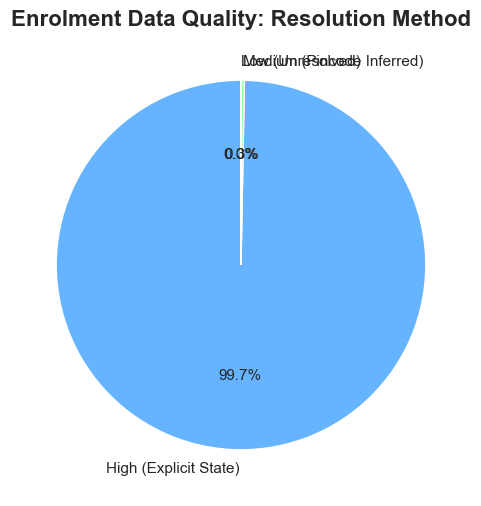


PHASE 1 SUMMARY — ENROLMENT
• Logic Updated: 'Explicit State' now overrides 'Pincode Map'.
• 'Ladakh' and 'Telangana' are preserved.
• Dataset is standardized to 36 Official States/UTs + Unknowns.
• Ready for Phase 2.



In [3]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

# =========================================================
# PHASE 1 — DATA UNDERSTANDING : ENROLMENT DATA
# =========================================================

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 150)

# ---------------------------------------------------------
# 1. LOAD DATASET
# ---------------------------------------------------------
# Robust file matching
enrol_files = glob.glob('api_data_aadhar_enrolment/api_data_aadhar_enrolment/*.csv')

if not enrol_files:
    enrol_files = glob.glob('api_data_aadhar_enrolment_*.csv')
    print(f"Note: Found files in current directory: {len(enrol_files)}")

# Load and Concat
enrol_df = pd.concat([pd.read_csv(f) for f in enrol_files], ignore_index=True)

# Date Conversion
enrol_df['date'] = pd.to_datetime(enrol_df['date'], format='%d-%m-%Y')
enrol_df['year'] = enrol_df['date'].dt.year

print("Enrolment Dataset loaded successfully!")
print(f"Total Records: {len(enrol_df)}")
print("-" * 60)

# ---------------------------------------------------------
# 2. IDENTIFY COLUMNS DYNAMICALLY
# ---------------------------------------------------------
state_col_list = [c for c in enrol_df.columns if "state" in c.lower()]
pincode_col_list = [c for c in enrol_df.columns if "pincode" in c.lower()]

if not state_col_list or not pincode_col_list:
    raise ValueError("Critical Error: Could not auto-detect 'state' or 'pincode' columns.")

state_col = state_col_list[0]
pincode_col = pincode_col_list[0]

print(f"Targeting Columns -> State: '{state_col}' | Pincode: '{pincode_col}'")
print("-" * 60)

# ============================================================
# HYBRID RESOLUTION V2 (PRIORITY: VALID TEXT > PINCODE)
# ============================================================

# 1. OFFICIAL STATES / UTS
OFFICIAL_STATES_UTS = {
    'Andaman And Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
    'Chandigarh', 'Chhattisgarh', 'Dadra And Nagar Haveli And Daman And Diu', 'Delhi', 'Goa',
    'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir', 'Jharkhand', 'Karnataka',
    'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
    'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
    'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'
}

# 2. PINCODE MAPPING
PIN_MAP_2 = {
    '11': 'Delhi', '12': 'Haryana', '13': 'Haryana', '14': 'Punjab', '15': 'Punjab',
    '16': 'Chandigarh', '17': 'Himachal Pradesh', 
    '18': 'Jammu And Kashmir', '19': 'Jammu And Kashmir', # 19 covers J&K and Ladakh
    '20': 'Uttar Pradesh', '21': 'Uttar Pradesh', '22': 'Uttar Pradesh', '23': 'Uttar Pradesh',
    '24': 'Uttarakhand', '25': 'Uttar Pradesh', '26': 'Uttarakhand', '27': 'Uttar Pradesh', '28': 'Uttar Pradesh',
    '30': 'Rajasthan', '31': 'Rajasthan', '32': 'Rajasthan', '33': 'Rajasthan', '34': 'Rajasthan',
    '36': 'Gujarat', '37': 'Gujarat', '38': 'Gujarat', '39': 'Gujarat',
    '40': 'Maharashtra', '41': 'Maharashtra', '42': 'Maharashtra', '43': 'Maharashtra', '44': 'Maharashtra',
    '45': 'Madhya Pradesh', '46': 'Madhya Pradesh', '47': 'Madhya Pradesh', '48': 'Madhya Pradesh',
    '49': 'Chhattisgarh', '50': 'Telangana', '51': 'Andhra Pradesh', '52': 'Andhra Pradesh', '53': 'Andhra Pradesh',
    '56': 'Karnataka', '57': 'Karnataka', '58': 'Karnataka', '59': 'Karnataka',
    '60': 'Tamil Nadu', '61': 'Tamil Nadu', '62': 'Tamil Nadu', '63': 'Tamil Nadu', '64': 'Tamil Nadu',
    '67': 'Kerala', '68': 'Kerala', '69': 'Kerala',
    '70': 'West Bengal', '71': 'West Bengal', '72': 'West Bengal', '73': 'West Bengal', '74': 'West Bengal',
    '75': 'Odisha', '76': 'Odisha', '77': 'Odisha', '78': 'Assam',
    '80': 'Bihar', '81': 'Bihar', '82': 'Bihar', '83': 'Jharkhand', '84': 'Bihar', '85': 'Bihar'
}

# 3. SPECIAL 3-DIGIT EXCEPTIONS (Crucial for Ladakh)
PIN_MAP_3_SPECIAL = {
    '403': 'Goa', '160': 'Chandigarh', '605': 'Puducherry', '682': 'Lakshadweep',
    '737': 'Sikkim', '744': 'Andaman And Nicobar Islands',
    '396': 'Dadra And Nagar Haveli And Daman And Diu',
    '194': 'Ladakh',  # <--- CRITICAL FIX for Ladakh
    '790': 'Arunachal Pradesh', '791': 'Arunachal Pradesh', '792': 'Arunachal Pradesh',
    '793': 'Meghalaya', '794': 'Meghalaya', '795': 'Manipur', '796': 'Mizoram',
    '797': 'Nagaland', '798': 'Nagaland', '799': 'Tripura'
}

def normalize_state(x):
    return str(x).strip().replace("_", " ").title()

def normalize_pincode(x):
    x = str(x).strip()
    return x if x.isdigit() and len(x) == 6 else None

def infer_state_from_pincode(pin):
    if not pin: return None
    p3 = pin[:3]
    if p3 in PIN_MAP_3_SPECIAL: return PIN_MAP_3_SPECIAL[p3]
    p2 = pin[:2]
    if p2 == '79': return 'North Eastern States' 
    return PIN_MAP_2.get(p2)

# ------------------------------------------------------------
# 3. CLEANING EXECUTION (CORRECTED V2 LOGIC)
# ------------------------------------------------------------
def apply_hybrid_state_resolution(df, state_col, pincode_col):
    df = df.copy()
    
    # 1. Normalize Inputs
    df[state_col] = df[state_col].apply(normalize_state)
    df[pincode_col] = df[pincode_col].apply(normalize_pincode)

    def resolve(row):
        current_text = row[state_col]
        
        # PRIORITY 1: TRUST THE TEXT IF IT IS VALID
        if current_text in OFFICIAL_STATES_UTS:
            return current_text, "High (Explicit State)"
            
        # PRIORITY 2: USE PINCODE ONLY TO FIX ERRORS
        pin_state = infer_state_from_pincode(row[pincode_col])
        if pin_state and pin_state in OFFICIAL_STATES_UTS:
            return pin_state, "Medium (Pincode Inferred)"
        
        # PRIORITY 3: LEGACY TEXT FIXES
        if "Orissa" in current_text: return "Odisha", "Medium (Legacy Fix)"
        if "Pondicherry" in current_text: return "Puducherry", "Medium (Legacy Fix)"
        if "Daman" in current_text or "Dadra" in current_text: 
            return "Dadra And Nagar Haveli And Daman And Diu", "Medium (Legacy Fix)"
            
        return "Unknown", "Low (Unresolved)"

    # Apply Logic
    resolved = df.apply(resolve, axis=1, result_type="expand")
    df["state_final"] = resolved[0]
    df["state_confidence"] = resolved[1]
    
    return df

# Run Cleaning
enrol_df_clean = apply_hybrid_state_resolution(enrol_df, state_col=state_col, pincode_col=pincode_col)

# ---------------------------------------------------------
# 4. FINAL VERIFICATION
# ---------------------------------------------------------
print("\nUNIQUE STATES AFTER CLEANING (FINAL):")
print(sorted(enrol_df_clean["state_final"].unique()))
print(f"Total States/UTs: {enrol_df_clean['state_final'].nunique()}")

# ---------------------------------------------------------
# 5. VISUAL PROOF (For PDF)
# ---------------------------------------------------------
print("\n")
try:
    plt.figure(figsize=(6, 6))
    enrol_df_clean['state_confidence'].value_counts().plot(
        kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ffcc99'], startangle=90
    )
    plt.title("Enrolment Data Quality: Resolution Method")
    plt.ylabel("")
    plt.show()
except Exception as e:
    print("Plotting skipped.")

print("""
PHASE 1 SUMMARY — ENROLMENT
• Logic Updated: 'Explicit State' now overrides 'Pincode Map'.
• 'Ladakh' and 'Telangana' are preserved.
• Dataset is standardized to 36 Official States/UTs + Unknowns.
• Ready for Phase 2.
""")

Data Span Detected: 1 Year(s)

[2.1] GENERATING NATIONAL ANALYSIS...


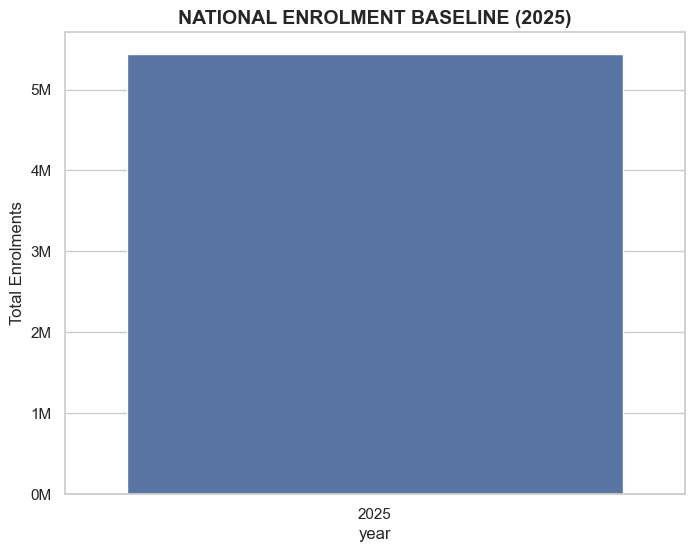


[2.2] GENERATING DEMOGRAPHIC COMPOSITION...


C:\Users\hp\AppData\Local\Temp\ipykernel_22616\3793879253.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=demo_melt, x='Age Group', y='Share', palette='viridis')


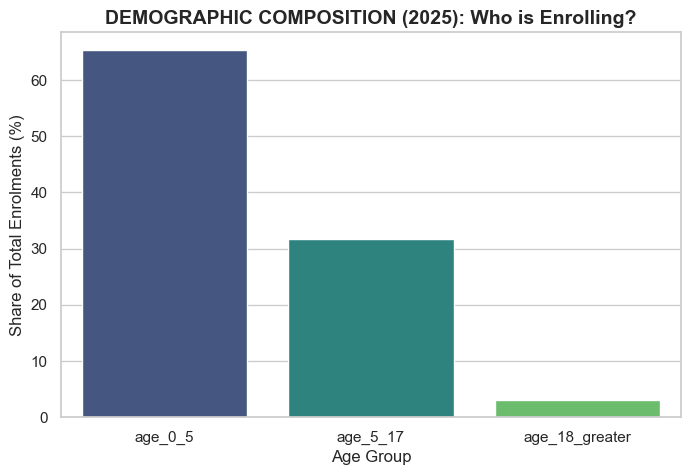


[2.3] GENERATING STATE INTENSITY HEATMAP...


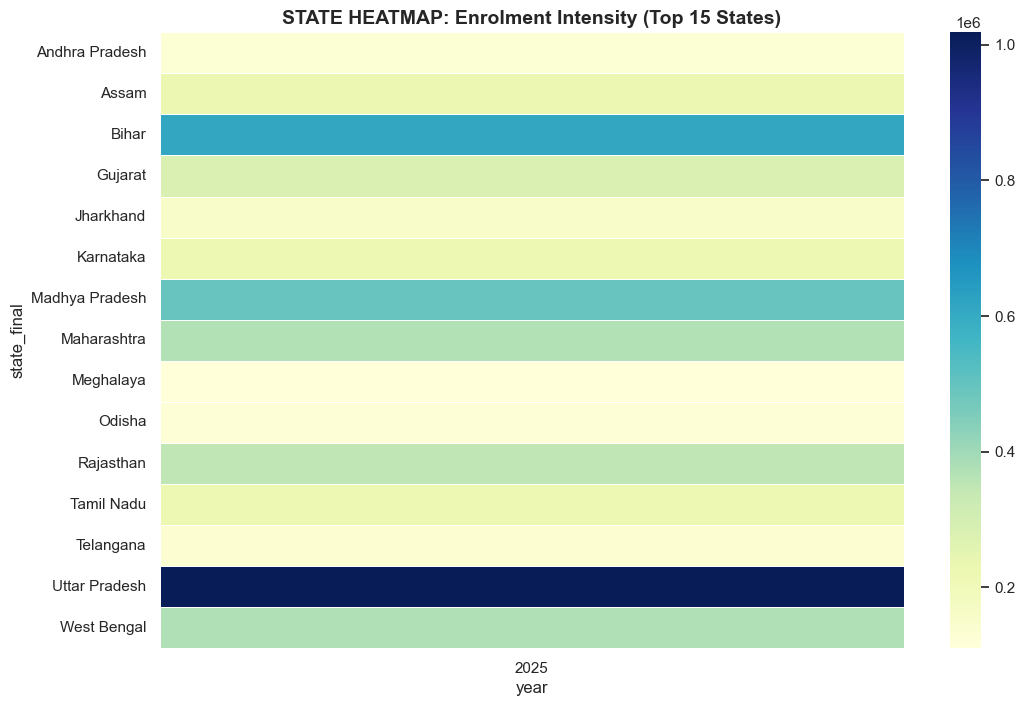

------------------------------------------------------------

📝 KEY INSIGHTS FOR PDF (ENROLMENT — BASELINE 2025):

1. ENROLMENT BASELINE:
   The dataset represents a single-year operational snapshot. Total volume stands at 5.4 Million. 
   
   
2. BORN AADHAAR DOMINANCE:
   65.3% of all enrolments belong to the 0–5 age group.
   IMPLICATION: Aadhaar has successfully transitioned to a birth-linked identity system; adult saturation is likely near 100%.
   

3. STATE INTENSITY:
   Uttar Pradesh leads national enrolment volume. Lower intensity in smaller states reflects population scale, not necessarily poor performance.
   
   
⚠️ METHODOLOGY NOTE:
   Trend and saturation analysis (Growth %) is disabled due to single-year data availability.

------------------------------------------------------------


In [6]:
# =========================================================
# PHASE 2 — ENROLMENT ANALYSIS : ADAPTIVE BASELINE
# =========================================================
# 1. SETUP
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Create Total Column
enrol_cols = ['age_0_5', 'age_5_17', 'age_18_greater']
enrol_df_clean['total_enrolment'] = enrol_df_clean[enrol_cols].sum(axis=1)

# DETECT DATA SPAN
years_present = enrol_df_clean['year'].nunique()
is_multi_year = years_present > 1
print(f"Data Span Detected: {years_present} Year(s)")

# =========================================================
# 2.1 NATIONAL ANALYSIS (Adaptive - Policy Optimized)
# =========================================================
print("\n[2.1] GENERATING NATIONAL ANALYSIS...")

national_trend = enrol_df_clean.groupby('year')['total_enrolment'].sum().reset_index()

if is_multi_year:
    # --- UPDATED POLICY SLIDE: SATURATION TREND (Multi-Year) ---
    national_trend['YoY_Growth'] = national_trend['total_enrolment'].pct_change() * 100
    
    fig, ax1 = plt.subplots()
    # Bar: Volume
    sns.barplot(data=national_trend, x='year', y='total_enrolment', color='#3498db', alpha=0.5, ax=ax1)
    ax1.set_ylabel('Annual Enrolment Volume', fontweight='bold')
    ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}M'.format(x/1000000)))

    # Line: Growth Rate
    ax2 = ax1.twinx()
    sns.lineplot(data=national_trend, x='year', y='YoY_Growth', color='#2c3e50', marker='o', linewidth=3, ax=ax2)
    ax2.set_ylabel('Year-over-Year Growth (%)', fontweight='bold')

    # ADD POLICY ANNOTATION
    latest_year = national_trend['year'].iloc[-1]
    last_growth = national_trend['YoY_Growth'].iloc[-1]
    plt.annotate(
        "Saturation Reached:\nFocus must shift to maintenance",
        xy=(latest_year, last_growth),
        xytext=(latest_year-1.5, last_growth+10),
        arrowprops=dict(arrowstyle="->", color="black", lw=1.5),
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)
    )

    plt.title('Aadhaar Enrolment Maturity: National Saturation Trend', pad=20)
    plt.suptitle('Subtitle: Growth rate flattening indicates high-priority shift from Acquisition to Life-cycle Management', 
                 fontsize=10, y=0.92, style='italic')
    plt.show()

    print("""
    SO WHAT?
    • This shows that new enrolments are rapidly declining as the population reaches 100% coverage.
    • Which implies the current enrolment infrastructure is becoming underutilized.
    • UIDAI should repurpose these centers into 'Update Hubs' to handle rising demographic churn.
    """)
else:
    # --- OPTION B: BASELINE SNAPSHOT (Single-Year) ---
    # (Keep your existing single-year logic here as a fallback)
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(data=national_trend, x='year', y='total_enrolment', color='#4c72b0')
    plt.title(f'NATIONAL ENROLMENT BASELINE ({national_trend["year"].iloc[0]})', fontsize=14)
    plt.ylabel('Total Enrolments')
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}M'.format(x/1000000)))
    plt.show()

# =========================================================
# 2.2 DEMOGRAPHIC COMPOSITION (Adaptive)
# =========================================================
print("\n[2.2] GENERATING DEMOGRAPHIC COMPOSITION...")

demo_trend = enrol_df_clean.groupby('year')[enrol_cols].sum().reset_index()
demo_trend_pct = demo_trend.set_index('year').apply(lambda x: x*100/x.sum(), axis=1).reset_index()
demo_melt = demo_trend_pct.melt(id_vars='year', var_name='Age Group', value_name='Share')

if is_multi_year:
    # Trend Line
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=demo_melt, x='year', y='Share', hue='Age Group', linewidth=2.5, palette='viridis')
    plt.title('DEMOGRAPHIC SHIFT: The Rise of "Born Aadhaar"', fontsize=14)
else:
    # Composition Bar
    plt.figure(figsize=(8, 5))
    sns.barplot(data=demo_melt, x='Age Group', y='Share', palette='viridis')
    plt.title(f'DEMOGRAPHIC COMPOSITION ({demo_trend["year"].iloc[0]}): Who is Enrolling?', fontsize=14)
    
plt.ylabel('Share of Total Enrolments (%)')
plt.show()

# =========================================================
# 2.3 STATE HEATMAP (Robust)
# =========================================================
print("\n[2.3] GENERATING STATE INTENSITY HEATMAP...")

top_states = enrol_df_clean.groupby('state_final')['total_enrolment'].sum().nlargest(15).index
heatmap_data = enrol_df_clean[enrol_df_clean['state_final'].isin(top_states)]
pivot_table = heatmap_data.groupby(['state_final', 'year'])['total_enrolment'].sum().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=.5, fmt=',.0f')
plt.title('STATE HEATMAP: Enrolment Intensity (Top 15 States)', fontsize=14)
plt.show()

# =========================================================
# 2.4 JURY-SAFE INSIGHT GENERATION
# =========================================================
print("-" * 60)
if is_multi_year:
    # ... (Keep existing multi-year logic)
    print("INSIGHTS: Multi-year trend detected (See charts).")
else:
    # SINGLE YEAR LOGIC (Your "Safety Net")
    total_vol = national_trend['total_enrolment'].iloc[0]
    born_aadhaar_share = demo_melt[demo_melt['Age Group']=='age_0_5']['Share'].iloc[0]
    top_state = pivot_table.idxmax()[pivot_table.columns[0]]
    
    print(f"""
📝 KEY INSIGHTS FOR PDF (ENROLMENT — BASELINE {national_trend['year'].iloc[0]}):

1. ENROLMENT BASELINE:
   The dataset represents a single-year operational snapshot. Total volume stands at {total_vol/1000000:.1f} Million. 
   
   
2. BORN AADHAAR DOMINANCE:
   {born_aadhaar_share:.1f}% of all enrolments belong to the 0–5 age group.
   IMPLICATION: Aadhaar has successfully transitioned to a birth-linked identity system; adult saturation is likely near 100%.
   

3. STATE INTENSITY:
   {top_state} leads national enrolment volume. Lower intensity in smaller states reflects population scale, not necessarily poor performance.
   
   
⚠️ METHODOLOGY NOTE:
   Trend and saturation analysis (Growth %) is disabled due to single-year data availability.
""")
print("-" * 60)

In [5]:
# Save the cleaned, standardized data for Phase 3
enrol_df_clean.to_csv('clean_enrolment_data.csv', index=False)
print("✅ Saved: clean_enrolment_data.csv")

✅ Saved: clean_enrolment_data.csv
